目录
🔍 特征理解

🔋 特征增强

🔨 特征构建

✅ 特征选择

💫 特征转换

📖 特征学习

作者：城东
链接：https://www.zhihu.com/question/28641663/answer/110165221
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

## 什么是特征

<div align=center>
<img width="700" src="imgs/toc.jpg"/>
</div>
<div align=center>目录</div>
特征工程是什么？　　有这么一句话在业界广泛流传：数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。那特征工程到底是什么呢？顾名思义，其本质是一项工程活动，目的是最大限度地从原始数据中提取特征以供算法和模型使用。通过总结和归纳，人们认为特征工程包括以下方面：
<div align=center>
<img width="700" src="https://pic2.zhimg.com/80/20e4522e6104ad71fc543cc21f402b36_hd.jpg"/>
</div>
<div align=center> </div>

5 总结　　再让我们回归一下本文开始的特征工程的思维导图，我们可以使用sklearn完成几乎所有特征处理的工作，而且不管是数据预处理，还是特征选择，抑或降维，它们都是通过某个类的方法fit_transform完成的，fit_transform要不只带一个参数：特征矩阵，要不带两个参数：特征矩阵加目标向量。这些难道都是巧合吗？还是故意设计成这样？方法fit_transform中有fit这一单词，它和训练模型的fit方法有关联吗？接下来，我将在《使用sklearn优雅地进行数据挖掘》中阐述其中的奥妙！6 参考资料FAQ: What is dummy coding?IRIS（鸢尾花）数据集卡方检验干货：结合Scikit-learn介绍几种常用的特征选择方法机器学习中，有哪些特征选择的工程方法？机器学习中的数学(4)-线性判别分析（LDA）, 主成分分析(PCA)





1. 结构化数据和非结构化数据
 > 例如可以用规则化网格、表格表示的数据： 图像，声音； 非结构化数据，例如文本，网络，图等。
 
2. 定量和定性数据
  > 定量数据：指的是一些数值，用于衡量某件东西的数量；
  
>定性数据：指的是一些类别，用于描述某件东西的性质。

除了定量和定性，还可以细分为定类（nominal）、定序（ordinal）、定距（interval）、定比数据（ratio）





1）定类（nominal）
只有分类，比如：血型（A／B／O／AB型）、性别（男／女）、货币（人民币／美元／日元），而且值得注意的是这些分类之间没有大小可比性。一般画图的话就只能看下分布占比，可以用**条形图、饼图**来表示。

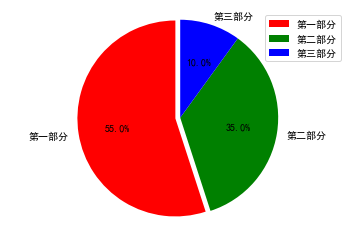

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

label_list = ["第一部分", "第二部分", "第三部分"]    # 各部分标签
size = [55, 35, 10]    # 各部分大小
color = ["red", "green", "blue"]     # 各部分颜色
explode = [0.05, 0, 0]   # 各部分突出值
"""
绘制饼图
explode：设置各部分突出
label:设置各部分标签
labeldistance:设置标签文本距圆心位置，1.1表示1.1倍半径
autopct：设置圆里面文本
shadow：设置是否有阴影
startangle：起始角度，默认从0开始逆时针转
pctdistance：设置圆内文本距圆心距离
返回值
l_text：圆内部文本，matplotlib.text.Text object
p_text：圆外部文本
"""
patches, l_text, p_text = plt.pie(size, explode=explode, colors=color, labels=label_list, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.axis("equal")    # 设置横轴和纵轴大小相等，这样饼才是圆的
plt.legend()
plt.show()

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


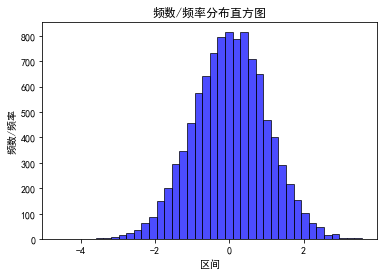

In [4]:

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# 随机生成（10000,）服从正态分布的数据
data = np.random.randn(10000)
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
plt.hist(data, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


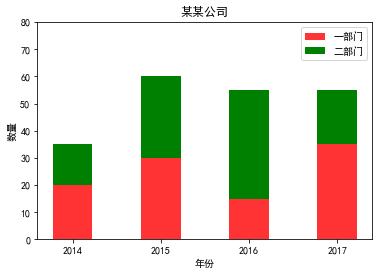

In [5]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

label_list = ['2014', '2015', '2016', '2017']
num_list1 = [20, 30, 15, 35]
num_list2 = [15, 30, 40, 20]
x = range(len(num_list1))
rects1 = plt.bar(left=x, height=num_list1, width=0.45, alpha=0.8, color='red', label="一部门")
rects2 = plt.bar(left=x, height=num_list2, width=0.45, color='green', label="二部门", bottom=num_list1)
plt.ylim(0, 80)
plt.ylabel("数量")
plt.xticks(x, label_list)
plt.xlabel("年份")
plt.title("某某公司")
plt.legend()
plt.show()

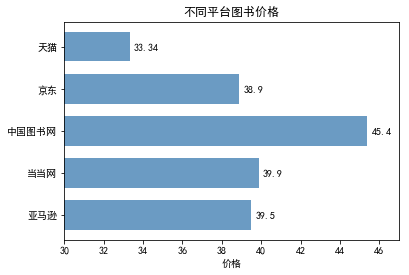

In [7]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

price = [39.5, 39.9, 45.4, 38.9, 33.34]
"""
绘制水平条形图方法barh
参数一：y轴
参数二：x轴
"""
plt.barh(range(5), price, height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(5), ['亚马逊', '当当网', '中国图书网', '京东', '天猫'])
plt.xlim(30,47)
plt.xlabel("价格")
plt.title("不同平台图书价格")
for x, y in enumerate(price):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

2）定序（ordinal）
不仅有分类属性，而且其属性还可以进行一定的排序，例如成绩 ABCD， 胖瘦， 漫游的调查。
可视化方面，和定类一样，不过就是多了一个 **箱体图** 可以用（因为定序变量可以有中位数）。

![1234]("/imgs/box-plot.png")

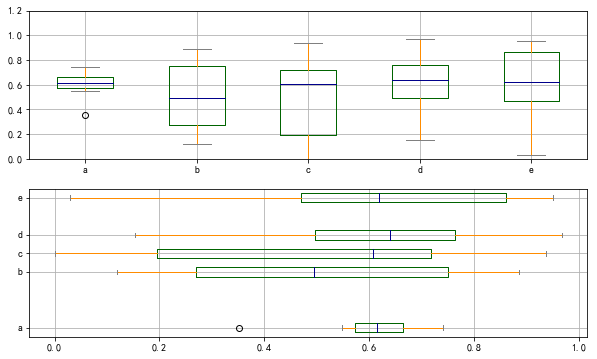

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
fig,axes = plt.subplots(2,1,figsize=(10,6))
df = pd.DataFrame(np.random.rand(10,5),columns=['a','b','c','d','e'])
color = dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
 
# 箱线图着色
# whiskers：分位数与error bar横线之间竖线的颜色
# medians：中位数线颜色
# caps：error bar横线颜色
 
df.plot.box(ylim = [0,1.2],
           grid = True,
           color = color,
           ax = axes[0]
           )
 
df.plot.box(vert = False,
           positions = [1,4,5,6,8],
           ax = axes[1],
           grid = True,
           color = color)

3）定距（interval）
定距的话，就是变量值之间可以做加减法计算，也就是可以引入均值、方差之类的名词了，而且能够画的图也多了，包括先前的那些，还包括了直方图。
4）定比（ratio）
定比相比于定距更加严格，不仅仅有定距的所有属性，同时，有一个 绝对零点 的概念，可以做加减乘除运算，比如说某个商品的价格是另一个的2倍。值得注意的是，温度一般不归入定比，而是定距，没有说20度是10度的两倍这种说法。


<div align=center>
<img width="700" src="imgs/data_cls.webp"/>
</div>
<div align=center>总结</div>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 4.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文

In [19]:
#数据集 Salary_Ranges_by_Job_Classification
salary_ranges = pd.read_csv('./data/Salary_Ranges_by_Job_Classification.csv')
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [21]:
salary_ranges.columns

Index(['SetID', 'Job Code', 'Eff Date', 'Sal End Date', 'Salary SetID',
       'Sal Plan', 'Grade', 'Step', 'Biweekly High Rate', 'Biweekly Low Rate',
       'Union Code', 'Extended Step', 'Pay Type'],
      dtype='object')

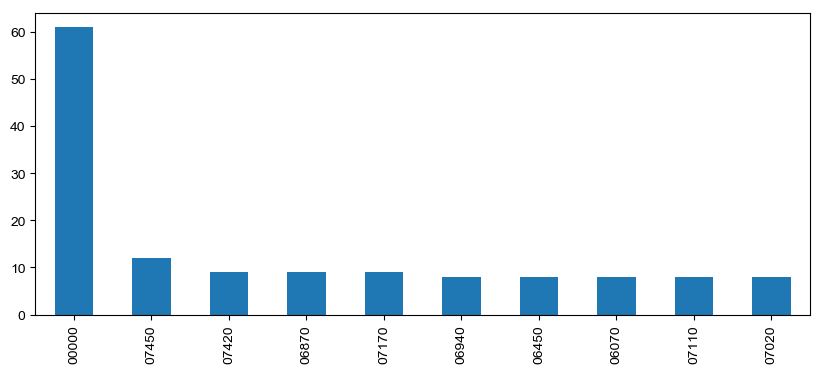

In [20]:
# 绘制条形图
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

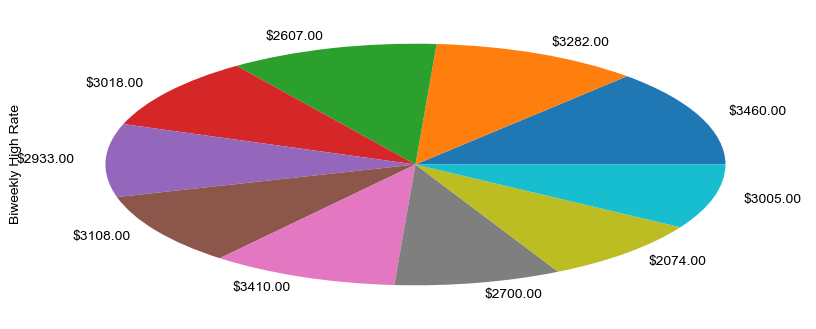

In [23]:
# 绘制饼图
salary_ranges['Biweekly High Rate'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie')

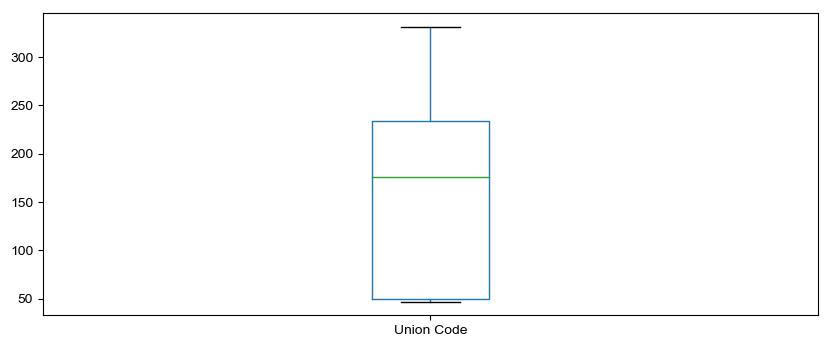

In [26]:
# 绘制箱体图
salary_ranges['Union Code'].value_counts().sort_values(ascending=False).head(5).plot(kind='box')

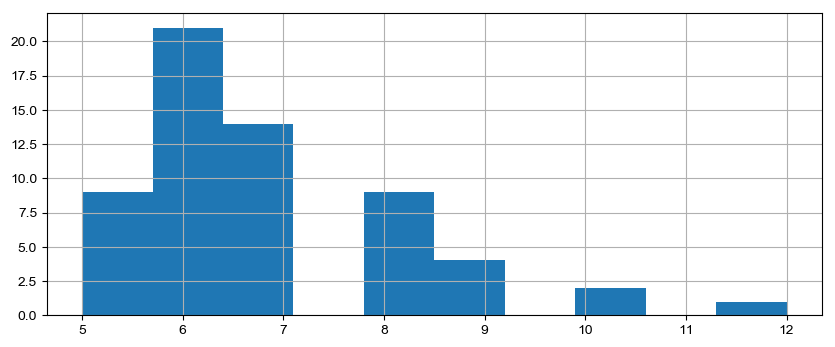

In [34]:
salary_ranges['Biweekly High Rate'].value_counts().sort_values(ascending=False).head(60).hist()

In [43]:
salary_ranges['Biweekly High Rate']

0           $0.00
1          $15.00
2          $25.00
3          $50.00
4         $100.00
5         $100.00
6         $200.00
7         $500.00
8           $0.00
9       $10630.00
10       $9175.00
11       $4142.00
12       $5242.00
13       $3293.00
14       $4496.00
15       $4676.00
16       $4762.00
17      $11255.00
18      $10376.00
19       $9096.00
20       $9456.00
21       $9641.00
22       $7392.00
23       $7687.00
24       $7835.00
25       $3794.62
26       $1326.00
27       $1425.00
28       $1532.00
29       $1646.00
          ...    
1326     $4857.00
1327     $4586.00
1328     $4770.00
1329     $4857.00
1330     $5237.00
1331     $5445.00
1332     $5548.00
1333     $6616.00
1334     $6881.00
1335     $7011.00
1336     $6515.00
1337     $2178.00
1338     $2342.00
1339     $2700.00
1340     $2354.00
1341     $3234.00
1342     $1909.00
1343     $2332.00
1344     $2459.00
1345     $2354.00
1346     $3199.00
1347     $3426.00
1348     $3689.00
1349     $1951.00
1350     $

## 02 特征增强
这一步其实就是数据清洗了，虽然上一步中也有涉及到部分清洗工作（比如清除空值、日期转换之类的），但却是分散的，这节重点讲讲数据清洗的一些技巧和实践代码，供大家在实际项目中去使用。
Step1: 进行**EDA（Exploratory Data Analysis）**，思路如下：
（1）首先看看目标占比情况（针对二分类问题，也就是0和1的占比情况），直接 value_counts()就可以解决，看看样本是否失衡。
（2）接着看看有没有空值，直接统计 isnull().sum() 的个数，不过需要注意的是，可能统计出来没有缺失，并不是因为真的没有缺失，而且缺失被人用某个特殊值填充了，一般会用 -9、blank、unknown、0之类的，需要注意⚠️识别，后面需要对缺失进行合理填充。
（2.1）怎么识别缺失值呢？一般可以通过 data.describe() 获取基本的描述性统计，根据均值、标准差、极大极小值等指标，结合变量含义来判断。

In [44]:
# 皮马印第安人糖尿病预测数据集
pima_columns = ['times_pregment','plasma_glucose_concentration','diastolic_blood_pressure','triceps_thickness',
                'serum_insulin','bmi','pedigree_function','age','onset_disbetes']
pima = pd.read_csv('./data/pima.data', names=pima_columns)
pima.head()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_pregment                  768 non-null int64
plasma_glucose_concentration    768 non-null int64
diastolic_blood_pressure        768 non-null int64
triceps_thickness               768 non-null int64
serum_insulin                   768 non-null int64
bmi                             768 non-null float64
pedigree_function               768 non-null float64
age                             768 non-null int64
onset_disbetes                  768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
pima.describe()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# 处理被错误填充的缺失值0，还原为 空(单独处理)
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x !=0 else None)

# 检查变量缺失情况
print(pima['serum_insulin'].isnull().sum())

# 批量操作 还原缺失值
columns = ['serum_insulin','bmi','plasma_glucose_concentration','diastolic_blood_pressure','triceps_thickness']

for col in columns:
    pima[col].replace([0], [None], inplace=True)

# 检查变量缺失情况
pima.isnull().sum()

374


times_pregment                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_disbetes                    0
dtype: int64

In [50]:
# 删除含有缺失值的行
pima_dropped = pima.dropna()
num_rows_lost = round(100*((pima.shape[0]-pima_dropped.shape[0])/pima.shape[0]))
print("保留了原先 {}% 的行".format(num_rows_lost))

保留了原先 49% 的行


Text(0,0.5,'% change')

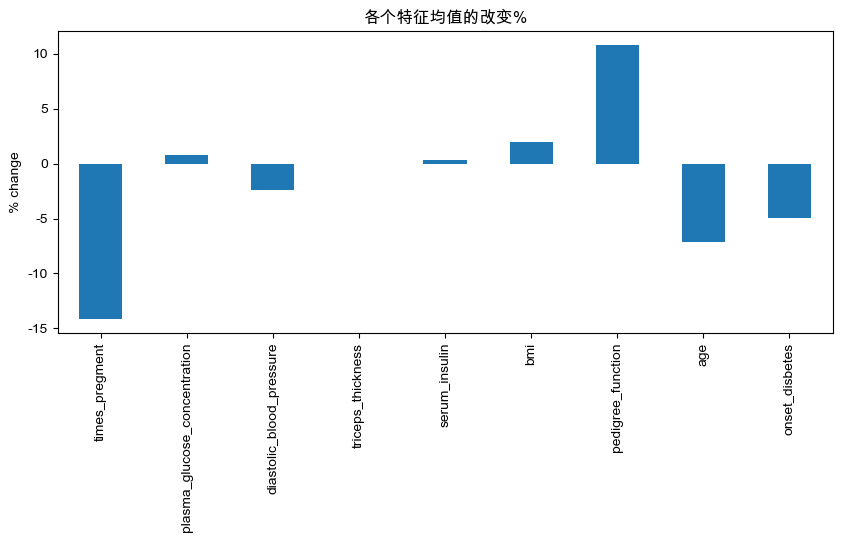

In [52]:
# 查看下 删除行 之后，各个特征均值的差异
ax = (100*(pima_dropped.mean()-pima.mean())/pima.mean()).plot(kind='bar', title='各个特征均值的改变%')
ax.set_ylabel('% change')

In [59]:
feature = pima.drop('onset_disbetes', axis=1) # 取出特征

In [60]:
label = pima['onset_disbetes'] # 得到label

In [62]:
# 使用sklearn的 Pipeline以及 Imputer来实现缺失值填充
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer

# 调参候选
knn_params = {'classify__n_neighbors':[1,2,3,4,5,6]}

# 实例化KNN模型
knn = KNeighborsClassifier()

# 管道设计
mean_impute = Pipeline([('imputer', Imputer(strategy='mean')),
                        ('classify',knn)
                       ])
# 网格搜索
grid = GridSearchCV(mean_impute, knn_params)
grid.fit(feature, label)

# 打印模型效果
print(grid.best_score_, grid.best_params_)

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sk

0.7317708333333334 {'classify__n_neighbors': 6}


C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sk

## 数据标准化 归一化

In [63]:
impute = Imputer(strategy='mean')
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima),columns=pima_columns)
pima_imputed_mean.head()

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAA5EADF98>,
      dtype=object)

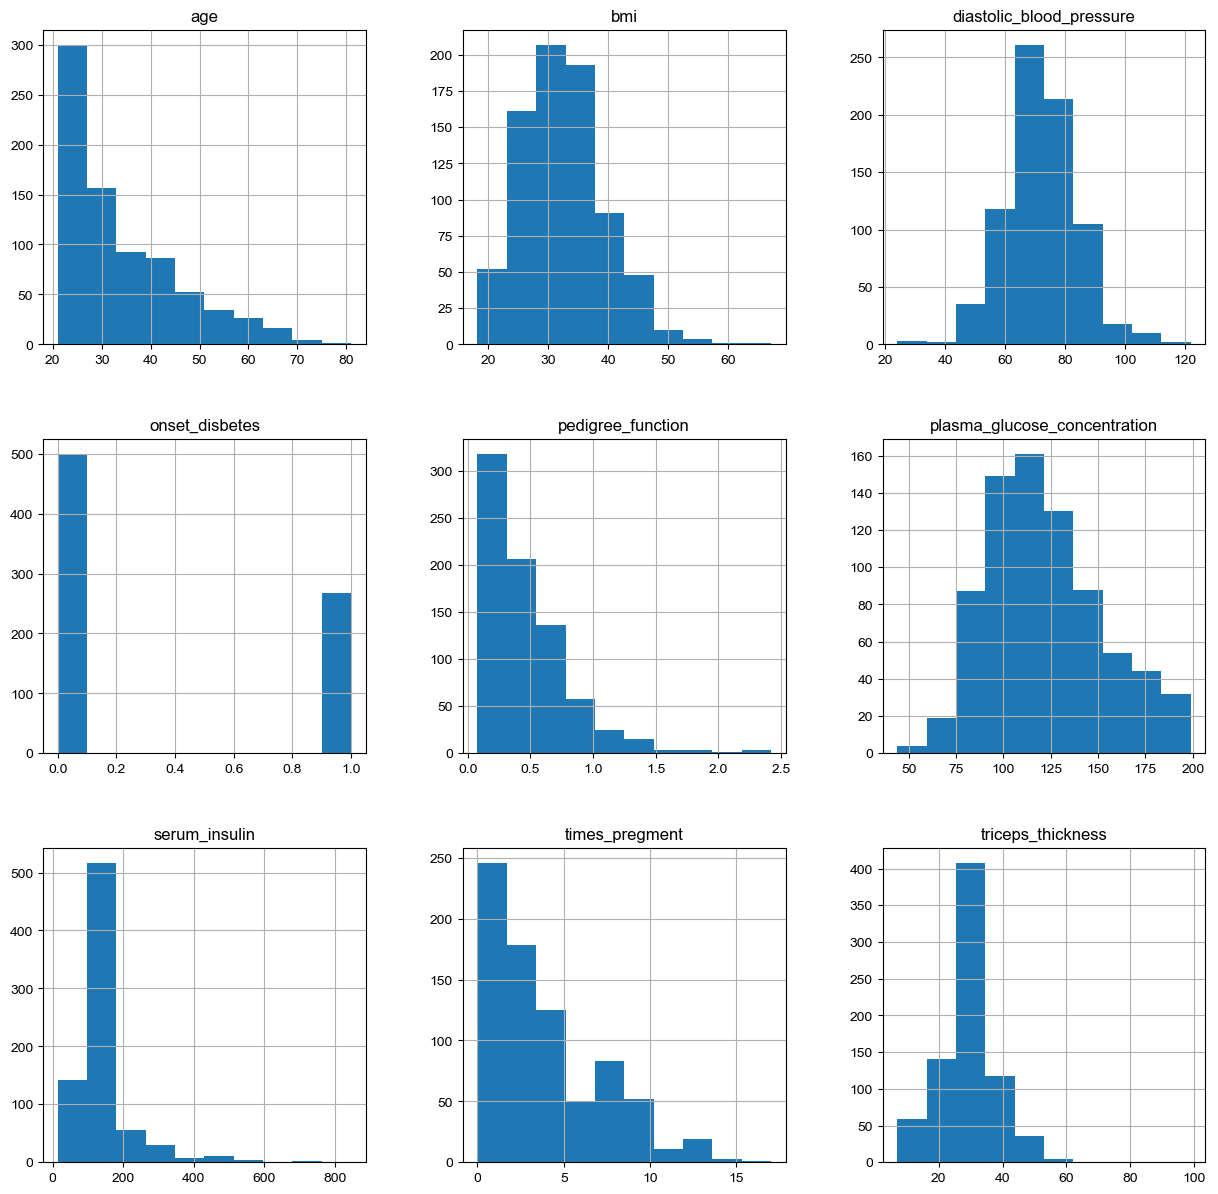

In [64]:
pima_imputed_mean.hist(figsize=(15,15))

In [70]:
# z分数标准化（单一特征）
import sklearn
# 实例化方法
scaler = sklearn.preprocessing.StandardScaler()
glucose_z_score_standarScaler = scaler.fit_transform(pima[['plasma_glucose_concentration']].fillna(-9))
# 可以看看转换之后的均值和标准差是否为0和1
glucose_z_score_standarScaler.mean(), glucose_z_score_standarScaler.std()




C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(-9.25185853854297e-18, 1.0)

times_pregment                  2.544261e-17
plasma_glucose_concentration   -3.301757e-16
diastolic_blood_pressure        6.966722e-16
triceps_thickness               6.866252e-16
serum_insulin                  -2.352033e-16
bmi                             3.553292e-16
pedigree_function               2.398978e-16
age                             1.857600e-16
onset_disbetes                  2.408374e-16
dtype: float64 times_pregment                  1.000652
plasma_glucose_concentration    1.000652
diastolic_blood_pressure        1.000652
triceps_thickness               1.000652
serum_insulin                   1.000652
bmi                             1.000652
pedigree_function               1.000652
age                             1.000652
onset_disbetes                  1.000652
dtype: float64


C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


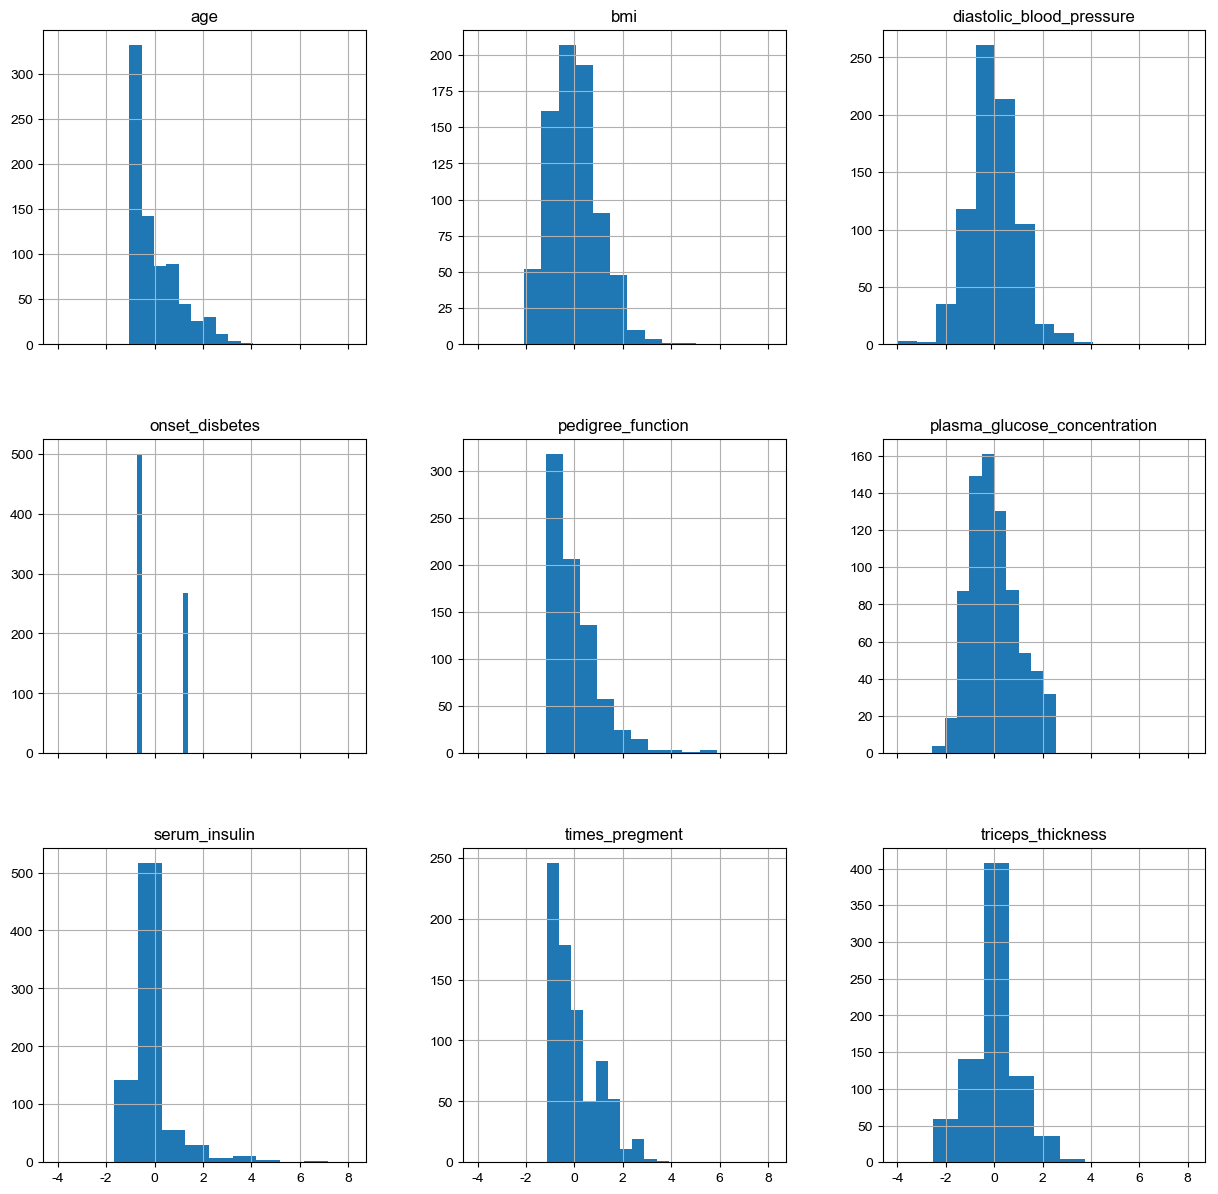

In [72]:
# z分数标准化（全部特征）
from sklearn.preprocessing import StandardScaler
# 实例化方法
scaler = sklearn.preprocessing.StandardScaler()
pima_imputed_mean_scaled = pd.DataFrame(scaler.fit_transform(pima_imputed_mean), columns=pima_columns)
# 看下标准化之后的分布
pima_imputed_mean_scaled.hist(figsize=(15,15), sharex=True)
print(pima_imputed_mean_scaled.mean(), pima_imputed_mean_scaled.std())

# 在Pipeline中使用
model = Pipeline([
    ('imputer', Imputer()),
    ('standardize', sklearn.preprocessing.StandardScaler())
])

Step3: 标准化和归一化
经过上面的处理，模型的精度可以达到0.73177，但我们可以继续优化吗？那是肯定的。

我们可以先看看所有特征的分布（特征少的时候可以这么看）：

我们重点关注3种方法：
1）Z分数标准化

最为常用的标准化技术，利用了统计学中的z分数思想，也就是将数据转换为均值为0，标准差为1的分布，其在python中的调用方法：

z分数标准化（单一特征）
from sklearn.preprocessing import StandardScaler

2）min-max标准化

min-max标准化和z-score类似，其公式为：（X - Xmin)/(Xmax - Xmin)
min-max标准化
from sklearn.preprocessing import MinMaxScaler
3）行归一化

行归一化针对的是每一行数据，不同于上面的两种方法（针对列），对行进行处理是为了保证每行的向量长度一样（也就是单位范围，unit norm），有L1、L2范数。
行归一化
from sklearn.preprocessing import Normalizer


## 03 特征构建
如果我们对变量进行处理之后，效果仍不是非常理想，就需要进行特征构建了，也就是衍生新变量。

而在这之前，我们需要了解我们的数据集，先前两节中我们了解到了可以通过 data.info 和 data.describe() 来查看，同时结合数据等级（定类、定序、定距、定比）来理解变量。

通过特征提取，我们能得到**未经处理的特征**，这时的特征可能有以下问题：
1. **不属于同一量纲**：即特征的规格不一样，不能够放在一起比较。无量纲化可以解决这一问题。
> 无量纲化，标准化，归一化等等，缩放

2. 信息**冗余**：对于某些定量特征，其包含的有效信息为区间划分，例如学习成绩，假若只关心“及格”或不“及格”，那么需要将定量的考分，转换成“1”和“0”表示及格和未及格。二值化可以解决这一问题。
> **Cut** 对数据进行划分区间

3. **定性特征**不能直接使用：某些机器学习算法和模型只能接受定量特征的输入，那么需要将定性特征转换为定量特征。最简单的方式是为每一种定性值指定一个定量值，但是这种方式过于灵活，增加了调参的工作。通常使用哑编码的方式将定性特征转换为定量特征：假设有N种定性值，则将这一个特征扩展为N种特征，当原始特征值为第i种定性值时，第i个扩展特征赋值为1，其他扩展特征赋值为0。哑编码的方式相比直接指定的方式，不用增加调参的工作，对于线性模型来说，使用哑编码后的特征可达到非线性的效果。 
>定性特征用哑编码 one-hot

4. ** 存在缺失值：缺失值需要补充。 
>数据清洗，null值填充，0，中位数，平均值等。

5. 信息利用率低：不同的机器学习算法和模型对数据中信息的利用是不同的，之前提到在线性模型中，使用对定性特征哑编码可以达到非线性的效果。类似地，对定量变量多项式化，或者进行其他的转换，都能达到非线性的效果。
> 多项式**扩展特征**

### 鸢尾花的特征预处理
使用sklearn中的IRIS（鸢尾花）数据集来对特征处理功能进行说明。IRIS数据集由Fisher在1936年整理，包含4个特征（Sepal.Length（花萼长度）、Sepal.Width（花萼宽度）、Petal.Length（花瓣长度）、Petal.Width（花瓣宽度）），特征值都为正浮点数，单位为厘米。目标值为鸢尾花的分类（Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），Iris Virginica（维吉尼亚鸢尾））。导入IRIS数据集的代码如下：



In [113]:
from sklearn.datasets import load_iris
 
#导入IRIS数据集
iris = load_iris()

#特征矩阵
print(iris.data.shape)

#目标向量
print(iris.target)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 无量纲化，就是标准化，归一化等
　无量纲化使不同规格的数据转换到同一规格。常见的无量纲化方法有标准化和区间缩放法。标准化的前提是特征值服从正态分布，标准化后，其转换成标准正态分布。区间缩放法利用了边界值信息，将特征的取值区间缩放到某个特点的范围，例如[0, 1]等。
 1. 标准化，均值和标准差，
from sklearn.preprocessing import StandardScaler
$$ 
x^{'} = \frac{x - \bar{X}} {S}
$$

In [115]:
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
iris_std_data1 = StandardScaler().fit_transform(iris.data)
print(iris_std_data1.std(), iris_std_data1.mean())
print(iris_std_data1[:2])


1.0 -1.4684549872375404e-15
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]]


In [124]:
iris_std_data2 = (iris.data - iris.data.mean(axis = 0))/iris.data.std(axis = 0)
print(iris_std_data2.std(), iris_std_data2.mean())
print(iris_std_data2[:2])

1.0 -1.4684549872375404e-15
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]]


区间缩放法
　　区间缩放法的思路有多种，常见的一种为利用两个最值进行缩放，公式表达为：

　　使用preproccessing库的MinMaxScaler类对数据进行区间缩放的代码如下：
  $$
  x^{'} = \frac{x - x_min} {x_max - x_min}
  $$
  

In [123]:
from sklearn.preprocessing import MinMaxScaler

#区间缩放，返回值为缩放到[0, 1]区间的数据
data = MinMaxScaler().fit_transform(iris.data)
print(data.mean(), data.std(),data.max(), data.min())

0.4486931104833647 0.26236724966560704 1.0 0.0


## 标准化和归一化的区别

1. 标准化，针对的是列向量，标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，将样本的特征值转换到同一量纲下。
2. 归一化 。归一化是依照特征矩阵的行处理数据，其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准，也就是说都转化为“单位向量”。

L2归一化的公式
$$
x^{'} = \frac{x} {\sqrt{\sum_j^m x[j]^2}}
$$

In [127]:
from sklearn.preprocessing import Normalizer

#归一化，返回值为归一化后的数据
Normalized_data = Normalizer().fit_transform(iris.data)
(Normalized_data[0]**2).sum()

0.9999999999999998

对定量特征二值化
　　定量特征二值化的核心在于设定一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0，公式表达如下：
$$ x^{'}=\left\{
\begin{array}{rcl}
1     &      & {x>thres}\\
0     &      & {x<= thres}\\
\end{array} \right. $$

In [129]:
from sklearn.preprocessing import Binarizer

#二值化，阈值设置为3，返回值为二值化后的数据
Binarizer(threshold=3).fit_transform(iris.data)[0]

array([1., 1., 0., 0.])

###  对定性特征哑编码
　　由于IRIS数据集的特征皆为定量特征，故使用其目标值进行哑编码（实际上是不需要的）。使用preproccessing库的OneHotEncoder类对数据进行哑编码的代码如下：

In [149]:
from sklearn.preprocessing import OneHotEncoder

#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
data = OneHotEncoder(categories='auto').fit_transform(iris.target.reshape((-1,1)))

缺失值计算　　由于IRIS数据集没有缺失值，故对数据集新增一个样本，4个特征均赋值为NaN，表示数据缺失。使用preproccessing库的Imputer类对数据进行缺失值计算的代码如下：from numpy import vstack, array, nan


In [166]:
from sklearn.preprocessing import Imputer
from numpy import vstack, array, nan
#缺失值计算，返回值为计算缺失值后的数据
#参数missing_value为缺失值的表示形式，默认为NaN
#参数strategy为缺失值填充方式，默认为mean（均值）
data_with_nan = vstack((array([nan, nan, nan, nan]), iris.data))
print(data_with_nan[0])
data_without_nan = Imputer().fit_transform(data_with_nan)
print(data_without_nan[0])

[nan nan nan nan]
[5.84333333 3.05733333 3.758      1.19933333]


C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


2.5 数据变换
　　常见的数据变换有基于多项式的、基于指数函数的、基于对数函数的。4个特征，度为2的多项式转换公式如下：
  使用preproccessing库的PolynomialFeatures类对数据进行多项式转换的代码如下：

In [170]:
from sklearn.preprocessing import PolynomialFeatures

#多项式转换
#参数degree为度，默认值为2
PolynomialFeatures(degree=3).fit_transform(iris.data).shape

(150, 35)

In [173]:
#基于单变元函数的数据变换可以使用一个统一的方式完成，使用preproccessing库的FunctionTransformer对数据进行对数函数转换的代码如下：from numpy import log1p
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer

#自定义转换函数为对数函数的数据变换
#第一个参数是单变元函数
FunctionTransformer(log1p).fit_transform(iris.data).shape

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


(150, 4)

In [73]:
import pandas as pd

X = pd.DataFrame({'city':['tokyo',None,'london','seattle','san fancisco','tokyo'],
                 'boolean':['y','n',None,'n','n','y'],
                 'ordinal_column':['somewhat like','like','somewhat like','like','somewhat like','dislike'],
                 'quantitative_column':[1,11,-.5,10,None,20]})

In [74]:
X

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,None,n,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhat like,NaN
5,tokyo,y,dislike,20.0


首先我们需要对分类变量进行填充操作，类别变量一般用众数或者特殊值来填充，回顾之前的内容，我们也还是采取Pipeline的方式来进行，因此可以事先基于TransformMixin基类来对填充的方法进行封装，然后直接在Pipeline中进行调用，代码可以参考：

### 缺失值用众数填充

In [76]:
# 填充分类变量（基于TransformerMixin的自定义填充器，用众数填充）
from sklearn.base import TransformerMixin

class CustomCategoryzImputer(TransformerMixin):
   def __init__(self, cols=None):
       self.cols = cols
       
   def transform(self, df):
       X = df.copy()
       for col in self.cols:
           X[col].fillna(X[col].value_counts().index[0], inplace=True)
       return X
   
   def fit(self, *_):
       return self  
   
   
# 调用自定义的填充器
cci = CustomCategoryzImputer(cols=['city','boolean'])
cci.fit_transform(X)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,tokyo,n,like,11.0
2,london,n,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhat like,NaN
5,tokyo,y,dislike,20.0


又或者利用 scikit-learn 的 Imputer类来实现填充，而这个类有一个 Strategy的方法自然就被继承过来用了，包含的有mean、median、most_frequent可供选择。

In [77]:
# 填充分类变量（基于Imputer的自定义填充器，用众数填充）
from sklearn.preprocessing import Imputer
class CustomQuantitativeImputer(TransformerMixin):
   def __init__(self, cols=None, strategy='mean'):
       self.cols = cols
       self.strategy = strategy
       
   def transform(self, df):
       X = df.copy()
       impute = Imputer(strategy=self.strategy)
       for col in self.cols:
           X[col] = impute.fit_transform(X[[col]])
       return X
   
   def fit(self, *_):
       return self
   
   
# 调用自定义的填充器
cqi = CustomQuantitativeImputer(cols = ['quantitative_column'], strategy='mean')
cqi.fit_transform(X)

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,None,n,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhat like,8.3
5,tokyo,y,dislike,20.0


In [79]:
# 全部填充
from sklearn.pipeline import Pipeline;

imputer = Pipeline([('quant',cqi),
                  ('category',cci)
])

imputer.fit_transform(X)

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,tokyo,n,like,11.0
2,london,n,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhat like,8.3
5,tokyo,y,dislike,20.0


填充完数据后，对分类变量进行编码，独热编码或者标签编码。

1）独热编码

独热编码主要是针对**定类变量**的，也就是不同变量值之间是没有顺序大小关系的，我们一般可以使用 scikit_learn 里面的 OneHotEncoding来实现的，但我们这里还是使用自定义的方法来加深理解。

In [81]:
# 类别变量的编码（独热编码）
class CustomDummifier(TransformerMixin):
   def __init__(self, cols=None):
       self.cols = cols
       
   def transform(self, X):
       return pd.get_dummies(X, columns=self.cols)
   
   def fit(self, *_):
       return self
   

# 调用自定义的填充器
cd = CustomDummifier(cols=['boolean','city'])
cd.fit_transform(X)

,ordinal_column,quantitative_column,boolean_n,boolean_y,city_london,city_san fancisco,city_seattle,city_tokyo
0,somewhat like,1.0,0,1,0,0,0,1
1,like,11.0,1,0,0,0,0,0
2,somewhat like,-0.5,0,0,1,0,0,0
3,like,10.0,1,0,0,0,1,0
4,somewhat like,NaN,1,0,0,1,0,0
5,dislike,20.0,0,1,0,0,0,1


2）标签编码

标签编码是针对**定序变量**的，也就是有顺序大小的类别变量，就好像案例中的变量ordinal_column的值（dislike、somewhat like 和 like 可以分别用0、1、2来表示），同样的可以写个自定义的标签编码器：

In [82]:
# 类别变量的编码（标签编码）
class CustomEncoder(TransformerMixin):
   def __init__(self, col, ordering=None):
       self.ordering = ordering
       self.col = col
       
   def transform(self, df):
       X = df.copy()
       X[self.col] = X[self.col].map(lambda x: self.ordering.index(x))
       return X
   
   def fit(self, *_):
       return self
   

# 调用自定义的填充器
ce = CustomEncoder(col='ordinal_column', ordering=['dislike','somewhat like','like'])
ce.fit_transform(X)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,1,1.0
1,None,n,2,11.0
2,london,None,1,-0.5
3,seattle,n,2,10.0
4,san fancisco,n,1,NaN
5,tokyo,y,0,20.0


数值变量分箱操作

以上的内容是对类别变量的一些简单处理操作，也是比较常用的几种，接下来我们就对数值变量进行一些简单处理方法的讲解。

有的时候，虽然变量值是连续的，但是只有转换成类别才有解释的可能，比如年龄，我们需要分成年龄段，这里我们可以使用pandas的 cut函数来实现。

In [83]:
# 数值变量处理——cut函数
class CustomCutter(TransformerMixin):
   def __init__(self, col, bins, labels=False):
       self.labels = labels
       self.bins = bins
       self.col = col
       
   def transform(self, df):
       X = df.copy()
       X[self.col] = pd.cut(X[self.col], bins=self.bins, labels=self.labels)
       return X
   
   def fit(self, *_):
       return self
   

# 调用自定义的填充器
cc = CustomCutter(col='quantitative_column', bins=3)
cc.fit_transform(X)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,0.0
1,None,n,like,1.0
2,london,None,somewhat like,0.0
3,seattle,n,like,1.0
4,san fancisco,n,somewhat like,NaN
5,tokyo,y,dislike,2.0


综上，我们可以对上面自定义的方法一并在Pipeline中进行调用，Pipeline的顺序为：

1）用imputer填充缺失值 ，NULL填充

2）独热编码city和boolean ， 独热编码编码

3）标签编码ordinal_column

4）分箱处理quantitative_column

代码为：

In [84]:
from sklearn.pipeline import Pipeline

# 流水线封装
pipe = Pipeline([('imputer',imputer),
                ('dummify',cd),
                ('encode',ce),
                ('cut',cc)
])

# 训练流水线
pipe.fit(X)

# 转换流水线
pipe.transform(X)

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,ordinal_column,quantitative_column,boolean_n,boolean_y,city_london,city_san fancisco,city_seattle,city_tokyo
0,1,0,0,1,0,0,0,1
1,2,1,1,0,0,0,0,1
2,1,0,1,0,1,0,0,0
3,2,1,1,0,0,0,1,0
4,1,1,1,0,0,1,0,0
5,0,2,0,1,0,0,0,1


### 数据的变量扩展， 人体胸部加速度数据集
# 人体胸部加速度数据集,标签activity的数值为1-7
```
1-在电脑前工作
2-站立、走路和上下楼梯
3-站立
4-走路
5-上下楼梯
6-与人边走边聊
7-站立着说话

```

In [86]:
df = pd.read_csv('./data/activity_recognizer/1.csv', header=None)
df.columns = ['index','x','y','z','activity']

In [87]:
#可以看到，加速度只有xyz数据
df.head(10)

,index,x,y,z,activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
5,5.0,1604,1959,1921,1
6,6.0,1640,1829,1940,1
7,7.0,1607,1910,1910,1
8,8.0,1546,2045,1910,1
9,9.0,1529,2049,1972,1


In [88]:
df.shape

(162501, 5)

这边只介绍一种多项式生成新特征的办法，调用PolynomialFeatures来实现。

In [89]:
# 扩展数值特征
from sklearn.preprocessing import PolynomialFeatures

x = df[['x','y','z']]
y = df['activity']

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

x_poly = poly.fit_transform(x)
pd.DataFrame(x_poly, columns=poly.get_feature_names()).head()

,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1502.0,2215.0,2153.0,2256004.0,3326930.0,3233806.0,4906225.0,4768895.0,4635409.0
1,1667.0,2072.0,2047.0,2778889.0,3454024.0,3412349.0,4293184.0,4241384.0,4190209.0
2,1611.0,1957.0,1906.0,2595321.0,3152727.0,3070566.0,3829849.0,3730042.0,3632836.0
3,1601.0,1939.0,1831.0,2563201.0,3104339.0,2931431.0,3759721.0,3550309.0,3352561.0
4,1643.0,1965.0,1879.0,2699449.0,3228495.0,3087197.0,3861225.0,3692235.0,3530641.0


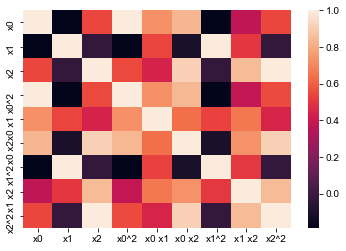

In [90]:
# 查看热力图(颜色越深代表相关性越强)
%matplotlib inline
import seaborn as sns

sns.heatmap(pd.DataFrame(x_poly, columns=poly.get_feature_names()).corr())

In [91]:
# 导入相关库
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()

# 在流水线中使用
pipe_params = {'poly_features__degree':[1,2,3],
              'poly_features__interaction_only':[True,False],
              'classify__n_neighbors':[3,4,5,6]}

# 实例化流水线
pipe = Pipeline([('poly_features',poly),
                ('classify',knn)])

# 网格搜索
grid = GridSearchCV(pipe, pipe_params)
grid.fit(x,y)

print(grid.best_score_, grid.best_params_)

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.7211894080651812 {'classify__n_neighbors': 5, 'poly_features__degree': 2, 'poly_features__interaction_only': True}


# 04 特征选择
好了，经过了上面的特征衍生操作，我们现在拥有了好多好多的特征（变量）了，全部丢进去模型训练好不好？当然是不行了🚫，这样子既浪费资源又效果不佳，因此我们需要做一下 特征筛选 ，而特征筛选的方法大致可以分为两大类：基于统计的特征筛选 和 基于模型的特征筛选。



在进行特征选择之前，我们需要搞清楚一个概念：到底什么是更好的？有什么指标可以用来量化呢？

这大致也可以分为两大类：一类是模型指标，比如accuracy、F1-score、R^2等等，还有一类是元指标，也就是指不直接与模型预测性能相关的指标，如：模型拟合/训练所需的时间、拟合后的模型预测新实例所需要的时间、需要持久化（永久保存）的数据大小。

我们可以通过封装一个方法，把上面提及到的指标封装起来，方便后续的调用，代码如下：

In [92]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, x, y):
   grid = GridSearchCV(model,
                       params,
                       error_score=0.)
   grid.fit(x,y)
   
   # 经典的性能指标
   print("Best Accuracy:{}".format(grid.best_score_))
   # 得到最佳准确率的最佳参数
   print("Best Parameters:{}".format(grid.best_params_))
   # 拟合的平均时间
   print("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
   
   # 预测的平均时间
   print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))
   
   
############### 使用示例 ###############
# 导入相关库
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()

# 在流水线中使用
pipe_params = {'poly_features__degree':[1,2,3],
              'poly_features__interaction_only':[True,False],
              'classify__n_neighbors':[3,4,5,6]}

# 实例化流水线
pipe = Pipeline([('poly_features',poly),
                ('classify',knn)])

# 网格搜索
get_best_model_and_accuracy(pipe, pipe_params, x, y)

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Accuracy:0.7211894080651812
Best Parameters:{'classify__n_neighbors': 5, 'poly_features__degree': 2, 'poly_features__interaction_only': True}
Average Time to Fit (s):0.134
Average Time to Score (s):1.669


通过上面的操作，我们可以创建一个模型性能基准线，用于对比后续优化的效果。接下来介绍一些常用的特征选择方法。

1）基于统计的特征选择
**针对于单变量**，我们可以采用 **皮尔逊相关系数以及假设检验** 来选择特征。

（1）皮尔逊相关系数可以通过 **corr()** 来实现，返回的值在-1到1之间，绝对值越大代表相关性越强；

（2）假设检验也就是p值，作为一种统计检验，在特征选择中，假设测试得原则是：” 特征与响应变量没有关系“（零假设）为真还是假。我们需要对每个变量进行检测，检测其与target有没有显著关系。可以使用 SelectKBest 和 f_classif 来实现。一般P值是介于0-1之间，简而言之，p值越小，拒绝零假设的概率就越大，也就是这个特征与target关系更大。



2）基于模型的特征选择
（1）对于文本特征，sklearn.feature_extraction.text里的 CountVectorizer有自带的特征筛选的参数，分别是 max_features、min_df、max_df、stop_words，可以通过搜索这些参数来进行特征选择，可以结合 SelectKBest 来实现流水线。

（2）针对🌲树模型，我们可以直接调用不同树模型算法里的 特征重要度 来返回特征重要度，比如 DecisionTreeClassifier里的feature_importances_，（除此之外还有RandomForest、GBDT、XGBoost、ExtraTreesClassifier等等）都可以直接返回每个特征对于本次拟合的重要度，从而我们可以剔除重要度偏低的特征，可以结合 SelectFromModel来实现流水线。

（3）使用正则化来筛选变量（针对线性模型）。有两种常用的正则化方法：L1正则化（Lasso）和L2正则化（岭）。



总结一下，有几点做特征选择的方法经验：
（1）如果特征是分类变量，那么可以从SelectKBest开始，用卡方或者基于树的选择器来选择变量；

（2）如果特征是定量变量，可以直接用线性模型和基于相关性的选择器来选择变量；

（3）如果是二分类问题，可以考虑使用 SelectFromModel和SVC；

（4）在进行特征选择前，还是需要做一下EDA。

当数据预处理完成后，我们需要选择有意义的特征输入机器学习的算法和模型进行训练。通常来说，从两个方面考虑来选择特征：

1. 特征是否发散：如果一个特征不发散，例如**方差接近于0**，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的**区分并没有什么用**。

2. 特征与目标的相关性：这点比较显见，与目标相关性高的特征，应当优选选择。除方差法外，本文介绍的其他方法均从相关性考虑

根据特征选择的形式又可以将特征选择方法分为3种：
1. Filter：过滤法，按照**发散性**或者**相关性对各个特征进行评分**，设定阈值或者待选择阈值的个数，选择特征。

2. Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。

3. Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。　　我们使用sklearn中的feature_selection库来进行特征选择。

### Filter 方法
方差选择法
使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征。使用feature_selection库的VarianceThreshold类来选择特征的代码如下：

In [182]:
from sklearn.feature_selection import VarianceThreshold

#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
VarianceThreshold(threshold=0.6).fit_transform(iris.data).shape

(150, 2)

相关系数法
　　使用相关系数法，先要计算各个特征对目标值的相关系数以及相关系数的P值。用feature_selection库的SelectKBest类结合相关系数来选择特征的代码如下：

In [205]:
x1 = np.array([[1,3,4],[3,4,2],[3,4,2]])
x2 = np.array([1,2,3])
fun1(iris.data,iris.target)

array([[ 7.82561232e-01, -4.26657561e-01,  9.49034699e-01,
         9.56547333e-01],
       [ 2.89047835e-32,  5.20156326e-08,  4.20187315e-76,
         4.15531102e-81]])

In [194]:
fun1 = lambda X, Y: array(list(map(lambda x: pearsonr(x, Y), X.T))).T

In [204]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，
#输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
#参数k为选择的特征个数
SelectKBest(fun1, k=2).fit_transform(iris.data, iris.target)

IndexError: index 2 is out of bounds for axis 0 with size 2

卡方检验　　经典的卡方检验是检验定性自变量对定性因变量的相关性。假设自变量有N种取值，因变量有M种取值，考虑自变量等于i且因变量等于j的样本频数的观察值与期望的差距，构建统计量：<img src="https://pic2.zhimg.com/50/7bc586c806b9b8bf1e74433a2e1976bc_hd.jpg" data-rawwidth="162" data-rawheight="48" class="content_image" width="162"/>　　不难发现，这个统计量的含义简而言之就是自变量对因变量的相关性。用feature_selection库的SelectKBest类结合卡方检验来选择特征的代码如下：


In [187]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#选择K个最好的特征，返回选择特征后的数据
SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target).shape

(150, 2)

互信息法　　经典的互信息也是评价定性自变量对定性因变量的相关性的，互信息计算公式如下：<img src="https://pic3.zhimg.com/50/6af9a077b49f587a5d149f5dc51073ba_hd.jpg" data-rawwidth="274" data-rawheight="50" class="content_image" width="274"/>　　为了处理定量数据，最大信息系数法被提出，使用feature_selection库的SelectKBest类结合最大信息系数法来选择特征的代码如下：

In [190]:
!pip install minepy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Stored in directory: C:\Users\Jarvis\AppData\Local\pip\Cache\wheels\9f\86\4f\9f142762df1b7281f172865cd449da8d8b1792c1bbf40bee62
Successfully built minepy


In [192]:
from sklearn.feature_selection import SelectKBest
from minepy import MINE
 
 #由于MINE的设计不是函数式的，定义mic方法将其为函数式的，返回一个二元组，二元组的第2项设置成固定的P值0.5
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

#选择K个最好的特征，返回特征选择后的数据
SelectKBest(lambda X, Y: array(list(map(lambda x:mic(x, Y), X.T))).T, k=2).fit_transform(iris.data, iris.target)

IndexError: index 2 is out of bounds for axis 0 with size 2

# 05 特征转换
经过了上面几个环节的“洗礼”，我们来到特征转换的环节，也就是使用源数据集的隐藏结构来创建新的列，常用的办法有2种：PCA和LDA。
✅ PCA：
PCA，即主成分分析（Principal Components Analysis），是比较常见的数据压缩的办法，即将多个相关特征的数据集投影到相关特征较少的坐标系上。也就是说，转换后的特征，在解释性上就走不通了，因为你无法解释这个新变量到底具有什么业务逻辑了。
PCA的原理这里就不展开来讲了，太多的文章把它讲得十分透彻了。这里主要是复现一下PCA在sklearn上的调用方法，一来继续熟悉下Pipeline的使用，二来理解一下PCA的使用方法。

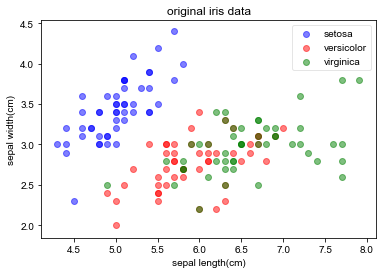

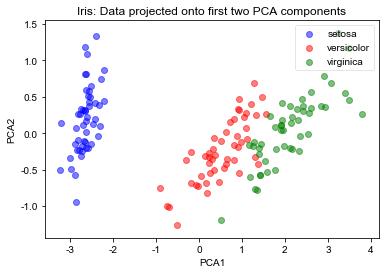

In [94]:
# 导入相关库
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

# 导入数据集
iris = load_iris()
iris_x, iris_y = iris.data, iris.target

# 实例化方法
pca = PCA(n_components=2)
# 训练方法
pca.fit(iris_x)
pca.transform(iris_x)[:5,]

# 自定义一个可视化的方法
label_dict = {i:k for i,k in enumerate(iris.target_names)}
def plot(x,y,title,x_label,y_label):
   ax = plt.subplot(111)
   for label,marker,color in zip(
   range(3),('^','s','o'),('blue','red','green')):
       plt.scatter(x=x[:,0].real[y == label],
                  y = x[:,1].real[y == label],
                  color = color,
                  alpha = 0.5,
                  label = label_dict[label]
                  )
       
   plt.xlabel(x_label)
   plt.ylabel(y_label)
   
   leg = plt.legend(loc='upper right', fancybox=True)
   leg.get_frame().set_alpha(0.5)
   plt.title(title)

# 可视化
plot(iris_x, iris_y,"original iris data","sepal length(cm)","sepal width(cm)")
plt.show()

plot(pca.transform(iris_x), iris_y,"Iris: Data projected onto first two PCA components","PCA1","PCA2")

以上是PCA在sklearn上的简单调用和效果展示，另外，作者提出了一个很有意思的问题：
一般而言，对特征进行归一化处理后会对机器学习算法的效果有比较明显的帮助，但为什么在书本的例子却是相反呢？


>给出的解释是：在对数据进行缩放后，列与列之间的协方差会更加一致，而且每个主成分解释的方差会变得分散，而不是集中在某一个主成分上。所以，在实际操作的时候，都要对缩放的未缩放的数据进行性能测试才是最稳妥的哦。

In [106]:
iris_x.shape
print(iris_x.mean(), iris_x.std())
iris_x_normalized = (iris_x - iris_x.mean(axis = 0))/iris_x.std(axis = 0)
print(iris_x_normalized.mean(), iris_x_normalized.std())

3.4644999999999997 1.9738430577598278
-1.4684549872375404e-15 1.0


In [107]:
pca.fit(iris_x_normalized)
pca.transform(iris_x_normalized)[:5,]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

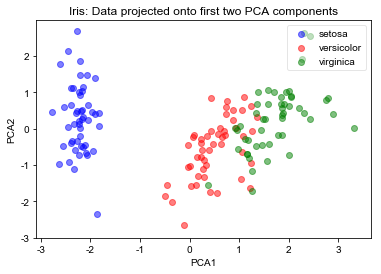

In [109]:
#标准化之后效果反而没有那么好
plot(pca.transform(iris_x_normalized), iris_y,"Iris: Data projected onto first two PCA components","PCA1","PCA2")

## ✅ LDA：
LDA，即**线性判别分析（Linear Discriminant Analysis）**，它是一个有监督的算法（哦对了, PCA是无监督的），一般是用于分类流水线的预处理步骤。与PCA类似，LDA也是提取出一个新的坐标轴，将原始的高维数据投影到低维空间去，而区别在于LDA不会去专注数据之间的方差大小，而是直接优化低维空间，以获得最佳的类别可分性。

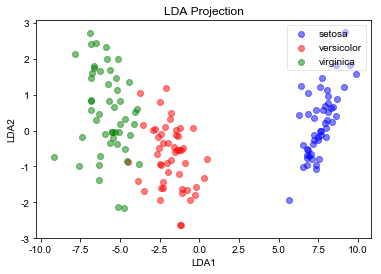

In [110]:
# LDA的使用
# 导入相关库
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 实例化LDA模块
lda = LinearDiscriminantAnalysis(n_components=2)
# 训练数据
x_lda_iris = lda.fit_transform(iris_x, iris_y)
# 可视化
plot(x_lda_iris, iris_y, "LDA Projection", "LDA1", "LDA2")

# 特征学习
## 数据的参数假设
参数假设指的是算法对数据形状的基本假设。比如上一章的PCA，我们是假设：
原始数据的形状可以被（特征值）分解，并且可以用单个线性变换（矩阵计算）表示。
而特征学习算法，就是要去除这个“假设”来解决问题，因为这算法**不会依赖数据的形状**，而是依赖于**随机学习（Stochastic Learning）**，指的是这些算法并不是每次输出相同的结果，而是一次次按轮（epoch）去检查数据点以找到要提取的最佳特征，并且可以拟合出一个最优的解决方法。
而在特征学习领域，有两种方法是比较常用的，也是下面来讲解的内容：受限玻尔兹曼机（RBM）和词嵌入。

 受限玻尔兹曼机（RBM）
RBM是一种简单的深度学习架构，是一组无监督的特征学习算法，根据数据的概率模型学习一定数量的新特征，往往使用RBM之后去用线性模型（线性回归、逻辑回归、感知机等）的效果极佳。
从概念上说，RBM是一个浅层（2层）的神经网络，属于深度信念网络（DBN，deep belief network）算法的一种。它也是一种无监督算法，可以学习到的 特征数量只受限于计算能力，它可能学习到比原始要少或者多的特征，具体要学习的特征数量取决于要解决的问题。

“受限”的说法是因为它只允许层与层之间的连接（层间连接），而不允许同一层内的节点连接（层内连接）。

In [ ]:
“受限”的说法是因为它只允许层与层之间的连接（层间连接），而不允许同一层内的节点连接（层内连接）。